In [1]:
%matplotlib widget

# This example shows how to read James Webb image

This example (loosly based on the "Read and plot an image from FITS file" on astropy https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html ).

Set up matplotlib and use a nicer set of plot parameters



In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import  astropy.visualization as asv 
from skimage.transform import resize # For resizing the images
import numpy as np
plt.style.use(astropy_mpl_style)

Open the image

In [89]:

from astropy.io import fits

# Image url
base_url='/home/pal/work/Satdata2/jwst/MAST_2026-01-26T1302/JWST/jw06783001001_02105_00003/'
imUrl = base_url + 'jw06783001001_02105_00003_nrca2_uncal.fits'

We now can have a look at what the file contains


In [90]:
file = fits.open(imUrl)

In [91]:
file.info()



Filename: /home/pal/work/Satdata2/jwst/MAST_2026-01-26T1302/JWST/jw06783001001_02105_00003/jw06783001001_02105_00003_nrca2_uncal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     206   ()      
  1  SCI           1 ImageHDU        80   (2048, 2048, 5, 1)   int16 (rescales to uint16)   
  2  ZEROFRAME     1 ImageHDU        12   (2048, 2048, 1)   int16 (rescales to uint16)   
  3  GROUP         1 BinTableHDU     38   6R x 13C   [J, I, I, J, I, 26A, I, I, I, I, 36A, D, D]   
  4  INT_TIMES     1 BinTableHDU     24   1R x 7C   [J, D, D, D, D, D, D]   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [8655B]   


The main image is located in "SCI", which we select with ``ext=1`` when reading the file.

Now we open the files and read in the image arrays. We also resize them so that they all
are the same size.

In [84]:
file[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
NAXIS3  =                    7                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'COEFFS  '           / extension name                                 

In [92]:
im = fits.getdata(imUrl, ext=1)

The data is now stored as a 2D numpy array. Print the dimensions using the
shape attribute:

In [93]:
print(im.shape,im.dtype)


(1, 5, 2048, 2048) uint16


We can now have a look at a greyscale image of the selected band. 
Here one might need to tune some of the parameters.

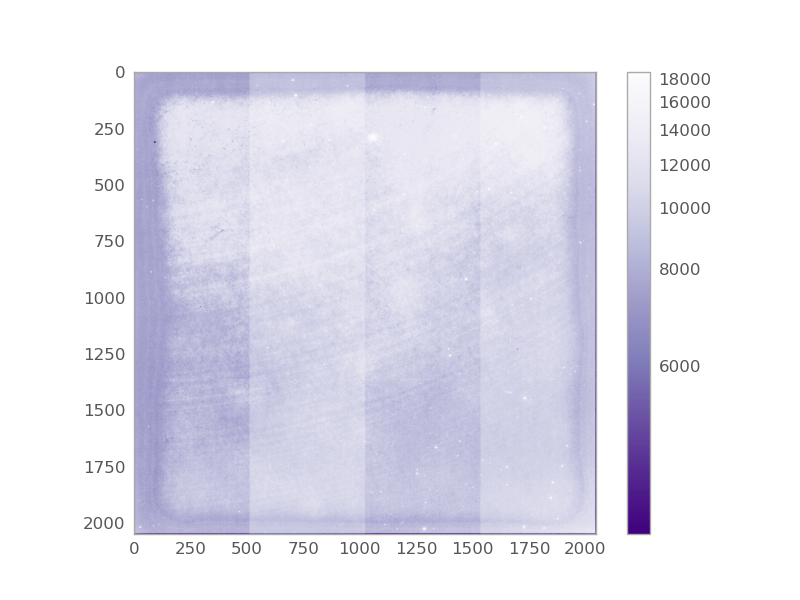

In [98]:
plt.figure(3)
plt.clf()
#display(np.min(im[:,:]), np.max(im[:,:]))
norm = asv.simple_norm(im, stretch='asinh',asinh_a=0.1, min_percent=0.1 ,max_percent=99.7) # How we scale the image
plt.imshow(im[0,0,:,:],norm=norm, cmap='Purples_r')
#plt.imshow(im[0,0,:,:], cmap='gray')# norm=norm,  Plotting the grayscale image
plt.grid(False)
plt.colorbar()
plt.show()